
## Real Estate (99acres.com) Model Building

## 1. Import sklearn Libraries

In [6]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [7]:
prop = pd.read_csv('Datasets/Final_Chennai.csv')
prop

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Om Sai Heights 2,Chennai,Chennai,0 to 1 Year,Ready To Move,Super Built Up Area,600.0,5333,4,1,2,32.0
1,Shree Manibhadra Heights,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,400.0,6125,8,1,2,24.5
2,Peninsula Celestia Spaces,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,1468.0,38487,10,3,3,565.0
3,Unnamed Property,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,692.0,30202,10,2,2,209.0
4,Unnamed Property,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,671.0,29657,10,2,2,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,Agarwal Lifestyle,Chennai,Chennai,1 to 5 Year,Ready To Move,Super Built Up Area,955.0,5350,7,2,2,51.1
95,Laxmi Avenue D Global City,Chennai,Chennai,1 to 5 Year,Ready To Move,Super Built Up Area,825.0,4127,3,2,2,34.0
96,Sumit Greendale,Chennai,Chennai,1 to 5 Year,Ready To Move,Super Built Up Area,630.0,4857,2,1,2,30.6
97,Mathuresh Krupa,Chennai,Chennai,1 to 5 Year,Ready To Move,Super Built Up Area,615.0,4351,5,1,1,26.8


## 3. Data Understanding

In [8]:
prop.shape

(99, 12)

In [9]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  99 non-null     object 
 1   Location       99 non-null     object 
 2   Region         99 non-null     object 
 3   Property_Age   99 non-null     object 
 4   Availability   99 non-null     object 
 5   Area_Tpye      99 non-null     object 
 6   Area_SqFt      99 non-null     float64
 7   Rate_SqFt      99 non-null     int64  
 8   Floor_No       99 non-null     int64  
 9   Bedroom        99 non-null     int64  
 10  Bathroom       99 non-null     int64  
 11  Price_Lakh     99 non-null     float64
dtypes: float64(2), int64(4), object(6)
memory usage: 9.4+ KB


In [10]:
prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [11]:
prop.describe().round()

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,99.0,99.0,99.0,99.0,99.0,99.0
mean,880.0,15225.0,8.0,2.0,2.0,130.0
std,366.0,9143.0,8.0,1.0,1.0,93.0
min,340.0,3641.0,0.0,1.0,1.0,19.0
25%,619.0,7837.0,3.0,1.0,2.0,55.0
50%,825.0,11455.0,5.0,2.0,2.0,110.0
75%,1108.0,23938.0,10.0,2.0,2.0,180.0
max,1750.0,38487.0,37.0,4.0,4.0,565.0


## 4. Feature Engineering

### 4.1 Drop Unwanted Columns

In [12]:
prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Om Sai Heights 2,Chennai,Chennai,0 to 1 Year,Ready To Move,Super Built Up Area,600.0,5333,4,1,2,32.0
1,Shree Manibhadra Heights,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,400.0,6125,8,1,2,24.5
2,Peninsula Celestia Spaces,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,1468.0,38487,10,3,3,565.0
3,Unnamed Property,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,692.0,30202,10,2,2,209.0
4,Unnamed Property,Chennai,Chennai,0 to 1 Year,Ready To Move,Carpet Area,671.0,29657,10,2,2,199.0


In [13]:
prop.drop(columns=['Property_Name', 'Location','Availability'], inplace =  True)
print('Shape of data :', prop.shape)

Shape of data : (99, 9)


### 4.2 Label Encoding for Categorical Columns

In [14]:
le = LabelEncoder()

In [15]:
for column in prop.describe(include='object').columns:
    prop[column] = le.fit_transform(prop[column])

In [16]:
prop.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,99.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Property_Age,99.0,1.23,1.12,0.0,0.0,1.0,2.0,3.0
Area_Tpye,99.0,1.41,0.65,0.0,1.0,2.0,2.0,2.0
Area_SqFt,99.0,879.67,365.90,340.0,619.0,825.0,1108.0,1750.0
Rate_SqFt,99.0,15224.81,9142.92,3641.0,7837.0,11455.0,23938.5,38487.0
Floor_No,99.0,8.14,8.32,0.0,3.0,5.0,10.0,37.0
Bedroom,99.0,1.91,0.73,1.0,1.0,2.0,2.0,4.0
Bathroom,99.0,2.01,0.61,1.0,2.0,2.0,2.0,4.0
Price_Lakh,99.0,129.58,93.21,19.0,55.0,110.0,180.0,565.0


In [17]:
prop

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,0,0,2,600.0,5333,4,1,2,32.0
1,0,0,1,400.0,6125,8,1,2,24.5
2,0,0,1,1468.0,38487,10,3,3,565.0
3,0,0,1,692.0,30202,10,2,2,209.0
4,0,0,1,671.0,29657,10,2,2,199.0
...,...,...,...,...,...,...,...,...,...
94,0,1,2,955.0,5350,7,2,2,51.1
95,0,1,2,825.0,4127,3,2,2,34.0
96,0,1,2,630.0,4857,2,1,2,30.6
97,0,1,2,615.0,4351,5,1,1,26.8


In [18]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Region        99 non-null     int32  
 1   Property_Age  99 non-null     int32  
 2   Area_Tpye     99 non-null     int32  
 3   Area_SqFt     99 non-null     float64
 4   Rate_SqFt     99 non-null     int64  
 5   Floor_No      99 non-null     int64  
 6   Bedroom       99 non-null     int64  
 7   Bathroom      99 non-null     int64  
 8   Price_Lakh    99 non-null     float64
dtypes: float64(2), int32(3), int64(4)
memory usage: 5.9 KB


### 4.3 Looking for Minimum & Maximum

In [19]:
for i in prop.columns:  
    print(i,'Min value :', prop[i].min(),'Max value :', prop[i].max())

Region Min value : 0 Max value : 0
Property_Age Min value : 0 Max value : 3
Area_Tpye Min value : 0 Max value : 2
Area_SqFt Min value : 340.0 Max value : 1750.0
Rate_SqFt Min value : 3641 Max value : 38487
Floor_No Min value : 0 Max value : 37
Bedroom Min value : 1 Max value : 4
Bathroom Min value : 1 Max value : 4
Price_Lakh Min value : 19.0 Max value : 565.0


### 4.4 Correlation Heatmap

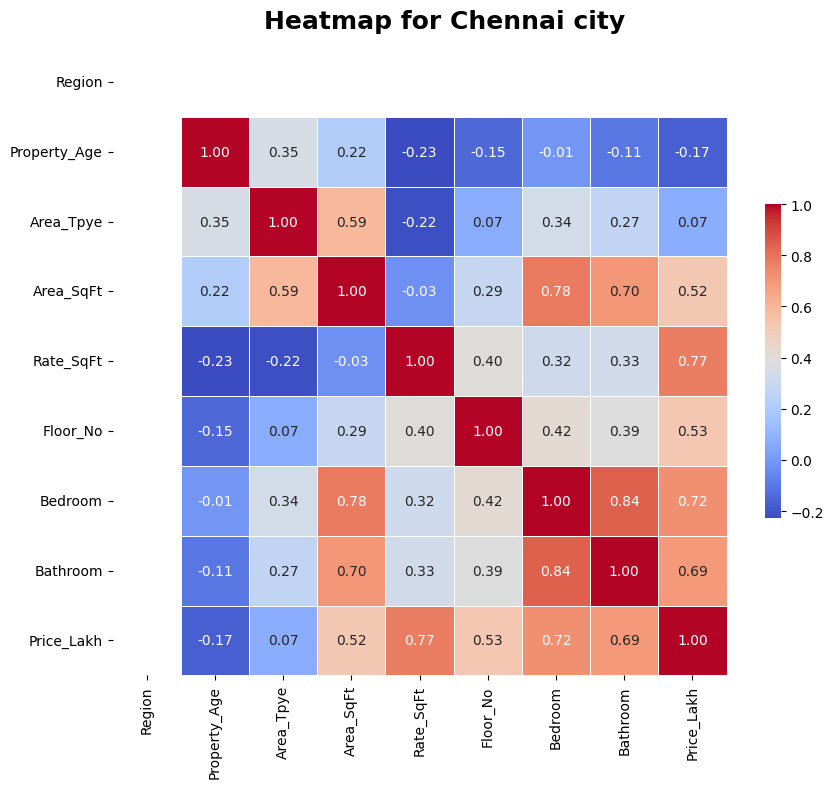

In [20]:
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(prop.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap for Chennai city',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

## 5. Model Building

In [21]:
prop.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,0,0,2,600.0,5333,4,1,2,32.0
1,0,0,1,400.0,6125,8,1,2,24.5
2,0,0,1,1468.0,38487,10,3,3,565.0
3,0,0,1,692.0,30202,10,2,2,209.0
4,0,0,1,671.0,29657,10,2,2,199.0


### 5.1 Train Test Split

In [22]:
X =  prop.drop('Price_Lakh', axis = 1)
y =  prop['Price_Lakh']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [24]:
print(X_train.shape, X_test.shape)
print(y_train.shape)

(79, 8) (20, 8)
(79,)


### 5.2 Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Training Accuracy =  0.9222236313047801
Test Accuracy     =  0.8192804166233912


### 5.3 Decision Tree Regressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.6428733478288503


### 5.4 Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train)

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.9785981458114107
Test Accuracy     =  0.8208707555813752


## Obeservaion :
### 1. We select the final model - Random Forest.
### 2. We got 95.79 % Model Accuracy.

## 6. Final Model Evaluation

In [28]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [29]:
evaluate(rf, X_train, y_train)

Average Error  = 8.0978 degrees
Model Accuracy = 0.9786 %


In [30]:
evaluate(rf, X_test, y_test)

Average Error  = 20.4190 degrees
Model Accuracy = 0.8209 %


### 6.1 Visualizing Results

In [31]:
pred = rf.predict(X_test)

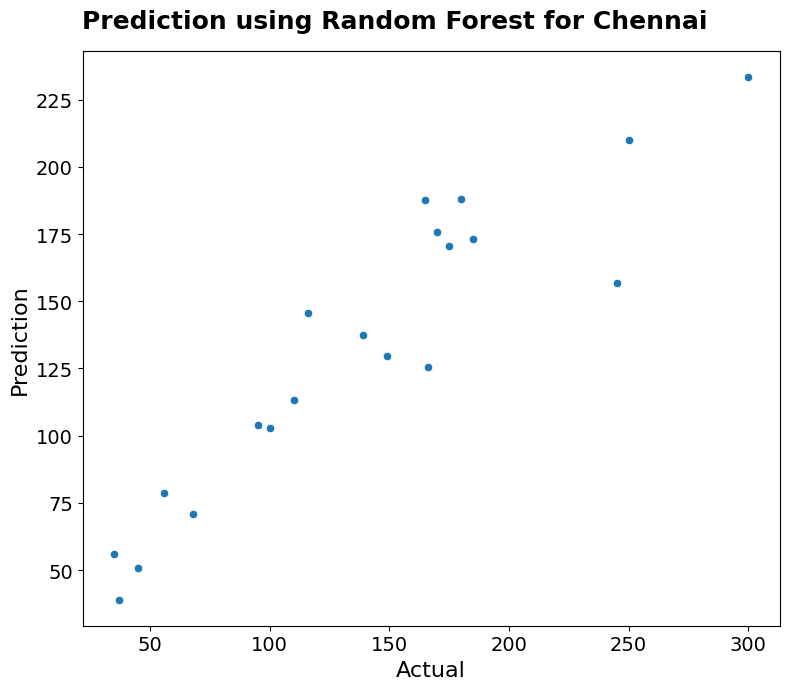

In [32]:
fig = plt.figure(figsize=(8,7))

sns.scatterplot(x=y_test, y=pred)
fig.suptitle('Prediction using Random Forest for Chennai', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#fig.savefig('Prediction_Polynomial', dpi = 500)

## 7. Model Deployement

In [33]:
from pickle import dump

In [34]:
dump(rf, open('regression_model.pkl', 'wb'))

# The End !!!